In [1]:
import matplotlib.pyplot as plt
import data as data_generation
import model
import explainer
import plot_utils

22-Dec-02 18:35:12 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.
/home/matt/anaconda3/envs/clime/lib/python3.9/site-packages/fatf/vis/__init__.py:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Data 
Generate dataset and get an unbalanced version as well

In [2]:
train_data, test_data = data_generation.get_data()
class_proportion = 0.2
unbalanced_train_data = data_generation.unbalance(train_data,class_proportion)

[0 1]
N:  0
Class  0  | Balanced =  57  , Unbalanced =  11
N:  1
Class  1  | Balanced =  63  , Unbalanced =  50


Plot the datasets

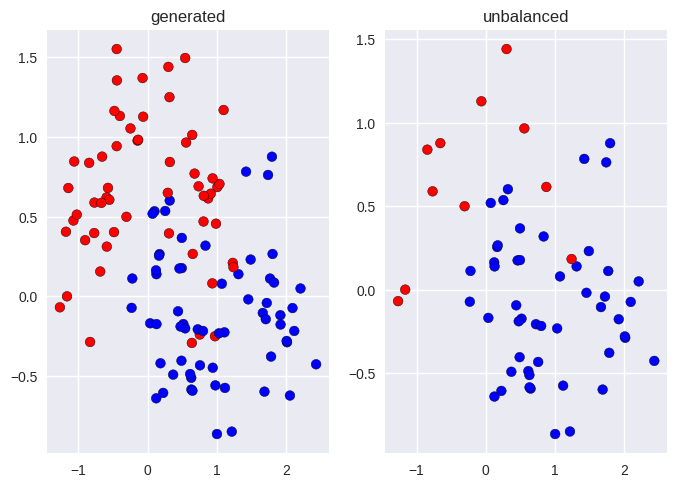

In [3]:
datasets = {'generated': train_data, 'unbalanced': unbalanced_train_data}
fig, axs = plt.subplots(1, len(datasets.keys()))
for i, key in enumerate(datasets.keys()):
    plot_utils.plot_classes(datasets[key], axs[i])
    axs[i].set_title(key)

# Model

In [4]:
clf = model.SVM(train_data)
clf_unbal = model.SVM(unbalanced_train_data)

plot the models' decision boundaries

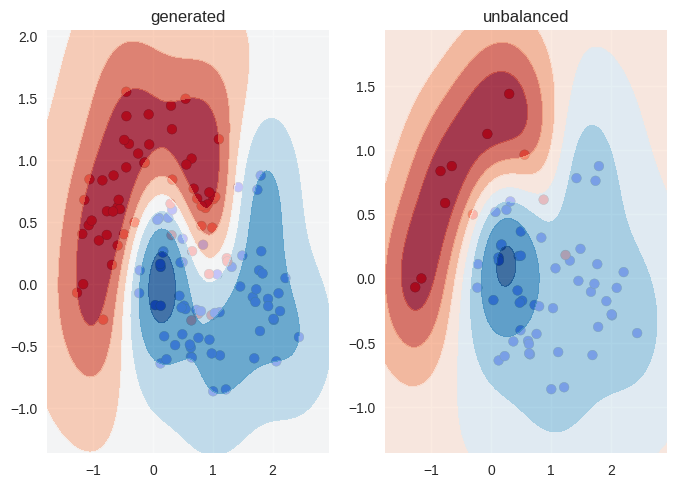

In [5]:
models = {'generated': clf, 'unbalanced': clf_unbal}
fig, axs = plt.subplots(1, len(datasets.keys()))
for i, key in enumerate(datasets.keys()):
    plot_utils.plot_classes(datasets[key], axs[i])
    plot_utils.plot_decision_boundary(models[key], datasets[key], ax=axs[i])
    axs[i].set_title(key)

## Adjust decision boundary for inbalance

In [6]:
weight = 1
clf_bal_boundary_unbal_data = model.SVM_balance_boundary(unbalanced_train_data, weight=weight)

plot adjusted classifiers

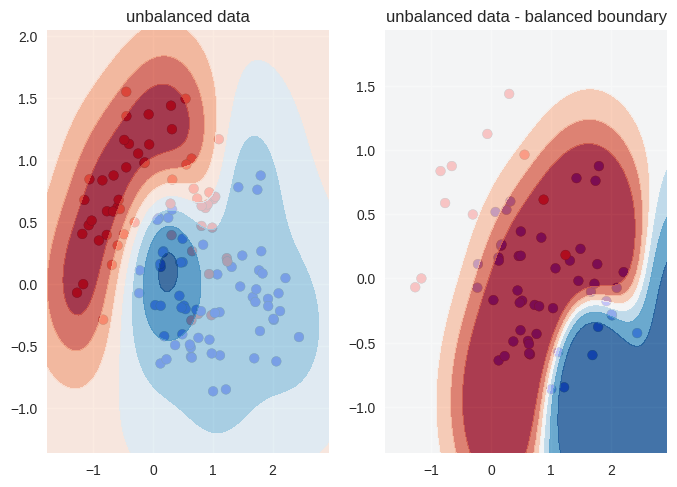

In [7]:
datasets = {'unbalanced data': train_data, 'unbalanced data - balanced boundary': unbalanced_train_data}
models = {'unbalanced data': clf_unbal, 'unbalanced data - balanced boundary': clf_bal_boundary_unbal_data}
fig, axs = plt.subplots(1, len(datasets.keys()))
for i, key in enumerate(datasets.keys()):
    plot_utils.plot_classes(datasets[key], axs[i])
    plot_utils.plot_decision_boundary(models[key], datasets[key], ax=axs[i])
    axs[i].set_title(key)

# Explainer

In [8]:
lime = explainer.LIME(train_data, clf)
lime_explanation = lime(test_data['X'][0, :])

lime_unbal = explainer.LIME(unbalanced_train_data, clf_unbal)
lime_explanation = lime_unbal(test_data['X'][0, :])

22-Dec-02 18:35:13 fatf.transparency.predictions.surrogate_explainers INFO     Selecting 2 features with forward selection.
22-Dec-02 18:35:13 fatf.transparency.predictions.surrogate_explainers INFO     Selecting 2 features with forward selection.


## Balanced Data Explanation

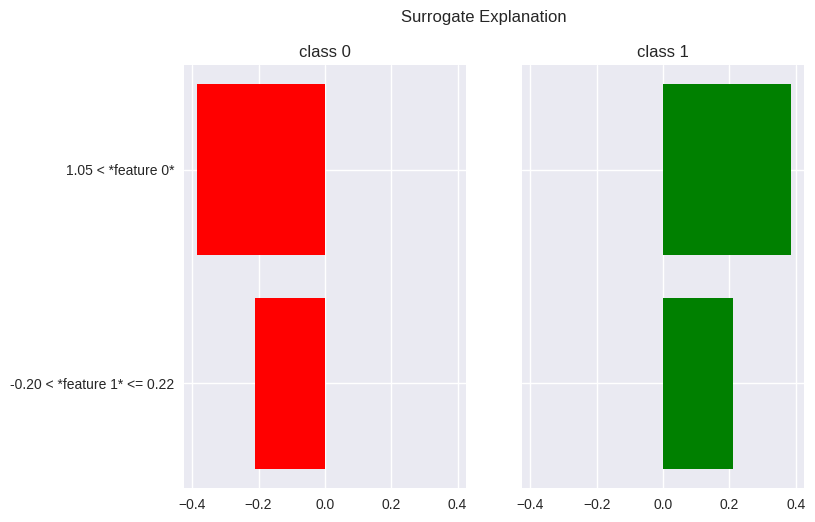

In [9]:
lime.plot_explanation()

## Unbalanced Data Explanation

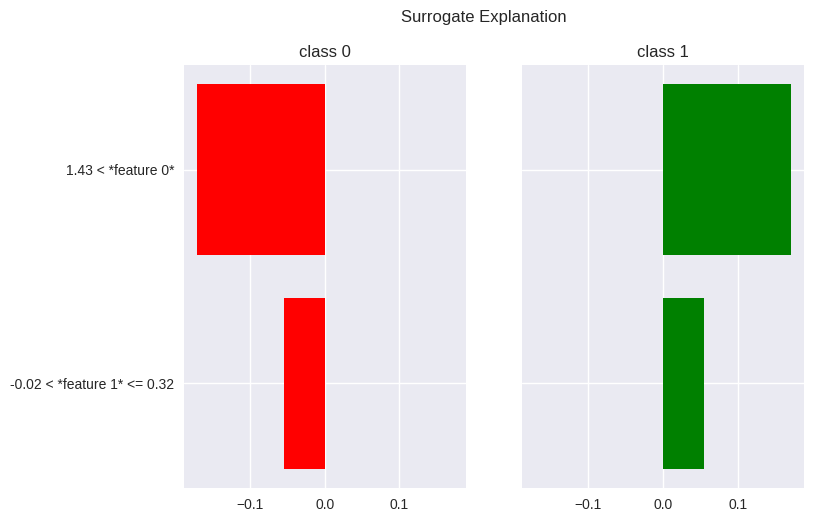

In [10]:
lime_unbal.plot_explanation()